# Problem 1 (Practice)

We learned how to construct an AND operator in the lecture. We will repeat this exercise, this time constructing an OR operator.

(a) Taking the two inputs as $x_1$ and $x_2$, predict what the values of the fitting parameters $W_1, W_2,$ and $b$ should be, where $v = W_1x_1 + W_2x_2 + b$. (10 pts)

For the two inputs $x_1$ and $x_2$, the OR operator acts like below

| $x_1$ | $x_2$ | $x_1 \lor x_2$ |
| :---: | :---: | :---: |
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 1 |

The parameter must work the separate the true and false value through the linear predictor, which means this line lies the (0,0) to below the line and other points lies on the above on the line. The equation of the line can be $x_2 = - x_1 + \frac{1}{2}$.

In the setting of $v = W_1x_1 + W_2x_2 + b$, we have

$$W_1 = 1, W_2 = 1, b = -0.5$$

(b) Write a program that learns to make the OR operator using perceptrons. Use $Nep=1000$ epochs, and a learning rate of $c=0.5$, and the sigmoid activation function
\begin{align*}
  y=h(v)=\frac{1}{1+e^{-v}}.
\end{align*}
Use the gradient descent method as the learning algorithm. Use the initial guesses $W_1 = 1, W_2=0.1, b=-1$. For every epochs, save the squared error, $\mathbf{W}$, and $b$. Plot the squared error as a function of epoch. Print out the initial and final $\mathbf{W}$ vector and bias $b$. Do the final values match your predictions? [Hint: Normalize $\mathbf{W}$ and $b$ by $W_1$ at when printing them.] (40 pts)

[1.  0.1] -1.0
[1.         0.99944152] -0.45304051453623284


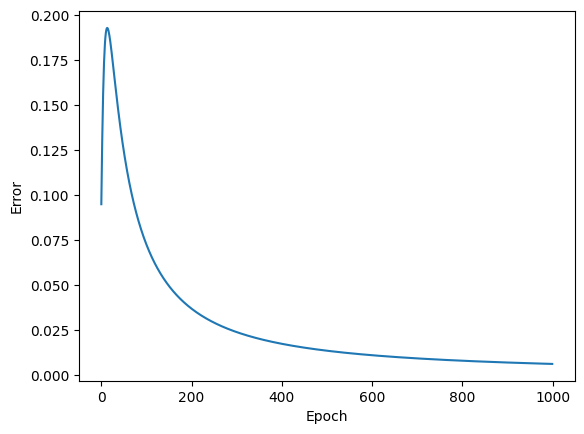

In [1]:
'''
- Set the initial value of the parameter and define the activation function
- For compute the gradient of the error function, find the derivative form of the activation function (Refer it from the lecture note)
'''

import numpy as np
import matplotlib.pyplot as plt

N = 4 # number of training sample
Nep = 1000 # number of epoch
c = 0.5 # learning rate

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x_train = np.array([[1,1], [1,0], [0,1], [0,0]])
a_train = np.array([1, 1, 1, 0])

e = np.zeros(4) # error array
W = np.array([1, 0.1])
b = -1

xarr = [] # epoch
yarr = [] # error
Warr = [] # weight
barr = [] # bias

print(W/W[0], b/W[0]) # print the initial decision boundary (initial slope)

for ep in range(Nep):
    for n in range(N):
        x = x_train[n]
        a = a_train[n]
        v = np.sum(W * x) + b
        y = sigmoid(v)
        e = a - y
        W = W + c*e*y*(1-y)*x
        b = b + c*e*y*(1-y)
    xarr.append(ep)
    yarr.append(e*e) # MSE
    Warr.append(W)
    barr.append(b)

print(W/W[0], b/W[0])
plt.plot(xarr, yarr)
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.show()


The normalized value of final vector and the bias are closely approximately match with first prediction in (a).

(c) Generate 1000 random $(x_1,x_2)$ points from (0,0) to (1,1). Make a scatter plot of these points, with the colors representing the value of $h(v)$. Are the points well-classified? (15 pts)

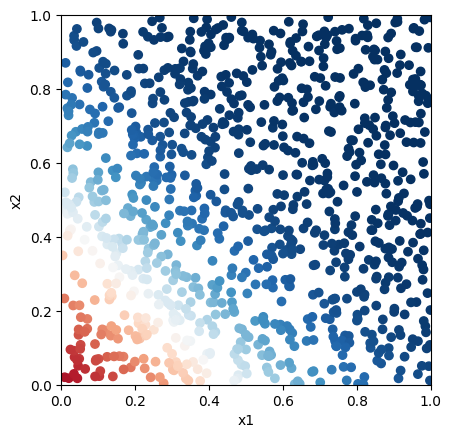

In [2]:
'''
- This is for visualization of the trained decision boundary of trained perceptron
- Choose the 1000 random points uniformly from [0,1] x [0,1]
- Use RdBu colormap
    - values near 0 (false) will map to red colors
    - values near 1 (true) will map to blue colors
    - values near 0.5 (decision boundary) will map to white/grey colors
'''

xlist = []
ylist = []

for i in range(1000):
    x = np.random.random(2)  
    y = np.sum(W@x) + b # compute the preactivation
    xlist.append(x)
    ylist.append(sigmoid(y))

colors = plt.cm.RdBu(ylist)
xlist = np.array(xlist)
plt.scatter(xlist[:,0], xlist[:,1], marker='o',c=colors)
plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim(0,1)
plt.ylim(0,1)
ax = plt.gca()
ax.set_aspect('equal')
plt.show()

The points are well classified since the scatter plot demonstrates that the perceptron successfully separates the input space. There is a distinct linear boundary that correctly classifies points near (0,0) as 0 and all other points as 1, consistent with the OR operator.

(d) Make a plot of the separator line $v=0$ as a function of epochs. (15 pts)

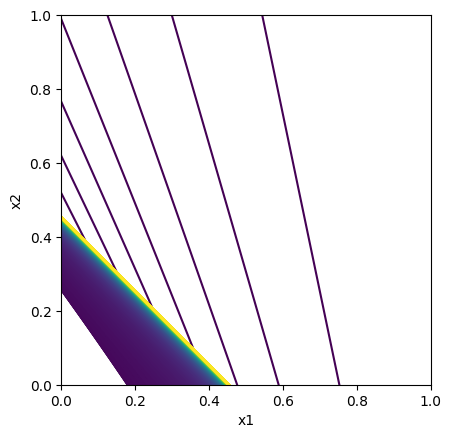

In [3]:
'''
- v = W_1x_1 + W_2x_2 + b = 0   =>   x_2 = - (W_1/W_2)x_1 - b/W_2
- use viridis colormap -> early epoch might be purple/blue and late epoch yellow/green
'''

x1 = np.linspace(0, 1, 100)
colors = plt.cm.viridis(np.linspace(0, 1, len(Warr)))
for n in range(len(barr)):
    plt.plot(x1, -(Warr[n][0]*x1+barr[n])/Warr[n][1], c=colors[n])
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(0, 1)
plt.ylim(0, 1)
ax = plt.gca()
ax.set_aspect('equal')
plt.show()

(e) The bias $b$ can actually by written as $W_0$, and then $v=\sum_{n=0}^2 W_n x_n$ where $x_0=1$. Modify your code so that instead of $b$, you provide a training data set including $x_0=1$ and learn the weight vector with three elements. Print out the final weight vector. Do the values agree with your previous result? (20 pts)

In [4]:
'''
- Set the trainnig data containing the bias term
- Implement the same logic as the previous problem
'''

x_train = np.array([[1,1,1], [1,1,0], [1,0,1], [1,0,0]])
a_train = np.array([1, 1, 1 ,0])
e = np.zeros(4)
W = np.array([-1,1,0.1])
xarr = []
yarr = []
Warr = []
print(W/W[1])
for ep in range(Nep):
    for n in range(N):
        x = x_train[n]
        a = a_train[n]
        v = np.sum(W*x)
        y = sigmoid(v)
        e = a - y
        W = W + c*e*y*(1-y)*x
        b = b + c*e*y*(1-y)
    xarr.append(ep)
    yarr.append(e*e)
    Warr.append(W)

print(W/W[1])

[-1.   1.   0.1]
[-0.45304051  1.          0.99944152]


The final weight vector of the prob 1(e) align perfectly with the normalized results obtained in prob 1(b)

---
# Problem 2

In the lecture, the updates for the weight vector elements were shown according to the gradient descent method, namely
\begin{align*}
    \Delta W_{ij} &= - c' \frac{\partial E}{\partial W_{ij}} = c e_i y_i (1-y_i)x_j,\\
    \Delta b_i &= -c' \frac{\partial E}{\partial b_i}=c e_i y_i(1-y_i),
\end{align*}
where $c'$ is the learning rate.

Use the error function
\begin{align*}
    E= \sum_i (a_i-y_i)^2,
\end{align*}
where $a_i$ is the training data, to derive the updates for the sigmoid activation function
\begin{align*}
    v_i &= \sum_j W_{ij}x_j + b_i,\\
    y_i &= h(v_i).
\end{align*}

(30 pts)

The error function is given $E = \sum_i (a_i - y_i)^2$. Let $e_i = a_i - y_i$

Using the chain rule, compute the gradient of the error function w.r.t. $W_{ij}$
$$\frac{\partial E}{\partial W_{ij}} = \frac{\partial E}{\partial y_i} \frac{\partial y_i}{\partial v_i} \frac{\partial v_i}{\partial W_{ij}}$$

Compute each partial derivative
$$
\frac{\partial E}{\partial y_i} = \frac{\partial}{\partial y_i} (a_i - y_i)^2 = 2(a_i - y_i)(-1) = -2(a_i - y_i) = -2e_i
$$
$$
\frac{\partial y_i}{\partial v_i} = \frac{\partial}{\partial v_i}\bigg(\frac{1}{1+e^{-v_i}}\bigg) = \frac{e^{-v_i}}{(1+e^{-v_i})^2} = \frac{1}{1+e^{-v_i}} \left( 1 - \frac{1}{1+e^{-v_i}} \right) = y_i(1-y_i)
$$
$$
\frac{\partial v_i}{\partial W_{ij}} = \frac{\partial }{\partial W_{ij}}\bigg( \sum_j W_{ij}x_j + b_i\bigg) = x_j
$$

So,
$$
\frac{\partial E}{\partial W_{ij}} = (-2e_i) \cdot (y_i(1-y_i)) \cdot x_j = -2 e_i y_i (1-y_i) x_j
$$

By defining $c = 2c'$, we have the update rule
$$
\Delta W_{ij} = - c' \frac{\partial E}{\partial W_{ij}} = -c' (-2 e_i y_i (1-y_i) x_j) = 2c' e_i y_i (1-y_i) x_j = c e_i y_i (1-y_i) x_j
$$

Similarly for the bias $b_i$
$$
\frac{\partial E}{\partial b_i} = \frac{\partial E}{\partial y_i} \frac{\partial y_i}{\partial v_i} \frac{\partial v_i}{\partial b_i}
$$

In this case, 
$$
\frac{\partial v_i}{\partial b_i} = \frac{\partial }{\partial b_i}\bigg( \sum_j W_{ij}x_j + b_i\bigg) = 1
$$

So,
$$
\frac{\partial E}{\partial b_i} = -2 e_i y_i (1-y_i)
$$
$$
\Delta b_i = -c' \frac{\partial E}{\partial b_i} = 2c' e_i y_i (1-y_i) = c e_i y_i (1-y_i)
$$

---
# Problem 3

In this problem, we will see that the gradient descent method is not the only learning algorithm, of which there can be various types.

Consider the activation function
\begin{align*}
    y = h(v) = \text{sign}\left({\sum_i W_{i}x_i }\right).
\end{align*}
This is similar but different from the Heaviside step function in that False is represented by -1 instead of 0.

Instead of the gradient descent method, we will use the following algorithm:
1.  Identify a misclassified point $y_n$ in the training data, i.e.,$\text{sign}\left(\sum_i W_{i}x_{in}\right) = y_n = -a_n$ where $a_n$ is the training output.

2.  Update the weight vector so that $W_{i} \rightarrow W_{i} + a_n x_{in}$

3.  Repeat until all training points are classified correctly.

(a) Explain why this algorithm would update the weight vector toward the correct value. [Hint: If a misclassified $y_n=1$, that means $a_n=-1$ and so the change in $W_i$ should act in such a way that decreases the argument of $h(v)$. Similarly for a misclassified $y_n=-1$.] (20 pts)

Let $\mathbf{W}^{(t)}$ be the weight vector at step $t$. Let $(\mathbf{x}_n, a_n)$ be a misclassified training example, where $\mathbf{x}_n$ is the input vector (augmented with bias) and $a_n \in \{-1, 1\}$ is the target label. The pre-activation is $v_n = \mathbf{W}^{(t)} \cdot \mathbf{x}_n$

There are two cases of misclassification
- case1: $a_n = 1$ but $v_n = \mathbf{W}^{(t)} \cdot \mathbf{x}_n < 0$ (the perceptron predicted -1)
- case2: $a_n = -1$ but $v_n = \mathbf{W}^{(t)} \cdot \mathbf{x}_n > 0$ (the perceptron predicted 1)

In both cases, we have
$$a_n (\mathbf{W}^{(t)} \cdot \mathbf{x}_n) < 0$$

Apply the update rule to $\mathbf{W}^{(t+1)}$ and multiply by $\mathbf{x}_n$ for analyzing the effect of update on the output
$$\mathbf{W}^{(t+1)} = \mathbf{W}^{(t)} + a_n \mathbf{x}_n$$
$$\mathbf{W}^{(t+1)} \cdot \mathbf{x}_n = (\mathbf{W}^{(t)} + a_n \mathbf{x}_n) \cdot \mathbf{x}_n$$
$$\mathbf{W}^{(t+1)} \cdot \mathbf{x}_n = \mathbf{W}^{(t)} \cdot \mathbf{x}_n + a_n ||\mathbf{x}_n||^2$$

In this formula, $||\mathbf{x}_n||^2$ must positive scalar

- case1
    - $a_n = 1$ and $\mathbf{W}^{(t)} \cdot \mathbf{x}_n < 0$.
    - $a_n ||\mathbf{x}_n||^2 > 0$ adds to the positive value to $\mathbf{W}^{(t)} \cdot \mathbf{x}_n$
    - This increases the value of $\mathbf{W} \cdot \mathbf{x}_n$, moving it from the negative region toward the positive region (the correct class)

- case2
    - $a_n = -1$ and $\mathbf{W}^{(t)} \cdot \mathbf{x}_n > 0$
    - $a_n ||\mathbf{x}_n||^2 < 0$ adds to the negative value to $\mathbf{W}^{(t)} \cdot \mathbf{x}_n$
    - This decreases the value of $\mathbf{W} \cdot \mathbf{x}_n$, moving it from the positive region toward the negative region (the correct class).

In both cases, the update rule modifies the $\mathbf{W}$ such that the projection of $\mathbf{x}_n$ onto $\mathbf{W}$ moves in the direction of the correct label $a_n$

Thus, above proof show that if the dataset is linearly separable, given algorithm will converge to a solution vector $\mathbf{W}^*$, which implies this algorithm would update the weight vector toward the correct value.

(b) Implement this algorithm for the operator for the initial weight vector $\mathbf{W}=(-2,1,0.2)$. What is the final weight? How many epochs did it take? (40 pts)

In [5]:
'''
- The weight vector are given as W = [w_0, w_1, w_2]^T in R^3, where w_0 is the bias term
- The training sample is set as X_n = [1, x_n1, x_n2]^T in R^3, where x0 = 1 is the argumented bias input
- Activation function is constructed sign function with binary label 
'''

x_train = np.array([[1,1,1], [1,1,0], [1,0,1], [1,0,0]])
a_train = np.array([1,1,1,-1])

W = np.array([-2, 1, 0.2])

def sign_activation(v):
    return np.where(v >= 0, 1, -1)

max_ep = 1000
fin_ep = 0

for ep in range(max_ep):
    count_misclassified = 0
    
    for n in range(len(x_train)):
        x = x_train[n]
        target = a_train[n]
        
        v = np.dot(W, x)
        prediction = sign_activation(v)
        
        if prediction != target:
            W = W + target * x
            count_misclassified += 1
    
    if count_misclassified == 0:
        fin_ep = ep + 1
        break

print(W)
print(fin_ep)

[-1.   2.   1.2]
2


The final weight is W = [w_0, w_1, w_2] = [-1, 2, 1.2] and it take the two epoch (completely separate the dataset linearly )

(c) Repeat Problem 1(c) for the obtained weight. Are the training points classified correctly? [Hint: there are an infinite number of lines that can separate the four points according to the OR operator output] (10 pts)

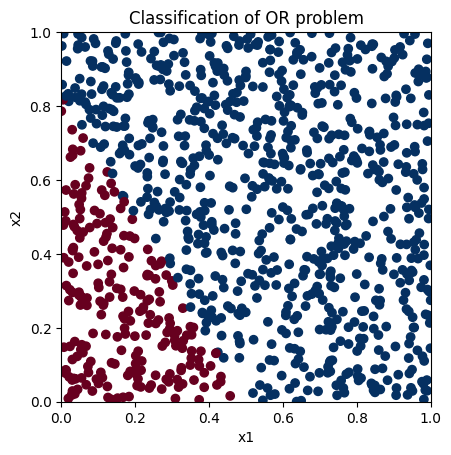

In [ ]:
'''
- Choose the 1000 random points uniformly from [0,1] x [0,1]
- Use RdBu colormap
    - values near 0 (false) will map to red colors
    - values near 1 (true) will map to blue colors
    - values near 0.5 (decision boundary) will map to white/grey colors
- Plotting with the same style parameters as Problem 1(c)
- In this plot, -1 is mapped to red (0 value) and 1 is mapped to blue (1 value)
'''

xlist = []
ylist = []

for i in range(1000):
    x_raw = np.random.random(2)
    x = np.array([1, x_raw[0], x_raw[1]])  # fix the bias term x_0 = 1
    v = np.dot(W, x)
    y = sign_activation(v)
    xlist.append(x_raw)
    # ylist.append((y + 1) / 2)
    ylist.append(float(y)) # since RdBu get the value as floating number, we must convert the integer value to floating value

colors = plt.cm.RdBu(ylist)
xlist = np.array(xlist)
plt.scatter(xlist[:,0], xlist[:,1], marker='o', c=colors)
plt.title('Classification of OR problem')
plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim(0,1)
plt.ylim(0,1)
ax = plt.gca()
ax.set_aspect('equal')
plt.show()

Are the training points classified correctly?

Yes. The point of (0,0) map to -1 and other points (0,1), (1,0), (1,1) map to 1, which exactly demostrates that the perceptron separates and consistent with the OR operator